In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [2]:
df = pd.read_csv(
    "data/airline_passengers.csv",
    index_col='Month',
    parse_dates=True
)

df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


## Simple Moving Average (SMA)

MA(Moving Average) 이며, rolling mean 으로 구할 수 있다.  
하지만 missing data 가 많고, window size 만큼 뒤로 밀리는 등의 특징을 갖고 있다.

In [5]:
df['6M_SMA'] = df['Thousands of Passengers'].rolling(window=6).mean()
df['12M_SMA'] = df['Thousands of Passengers'].rolling(window=12).mean()

In [10]:
df.head(15)

,Thousands of Passengers,6M_SMA,12M_SMA
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,NaN,NaN
1949-03-01,132,NaN,NaN
1949-04-01,129,NaN,NaN
1949-05-01,121,NaN,NaN
1949-06-01,135,124.500000,NaN
1949-07-01,148,130.500000,NaN
1949-08-01,148,135.500000,NaN
1949-09-01,136,136.166667,NaN


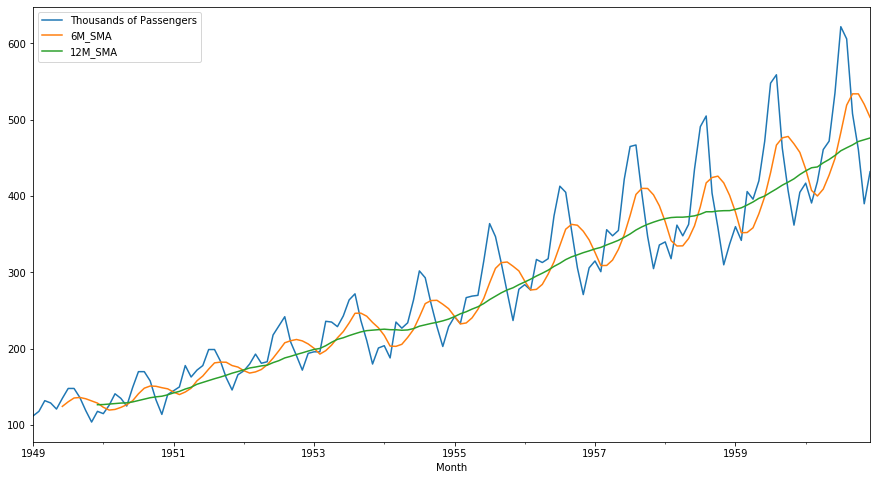

In [16]:
df[['Thousands of Passengers', '6M_SMA', '12M_SMA']].plot(figsize=(15, 8));

## Weighted Moving Average (WMA)

SMA 를 보완하기 위해 나온 방법.  
최근 data 일 수록 가중치(weights)를 많이 주고, 오래된 data 일 수록 가중치를 적게 준다.  
  
_(pandas 함수를 이용하면, 뒤로 밀리지 않는다.)_

In [26]:
df['6M_WMA'] = df['Thousands of Passengers'].ewm(span=6).mean()
df['12M_WMA'] = df['Thousands of Passengers'].ewm(span=12).mean()

In [27]:
df.head(15)

,Thousands of Passengers,6M_SMA,12M_SMA,6M_WMA,12M_WMA
Month,,,,,
1949-01-01,112,NaN,NaN,112.000000,112.000000
1949-02-01,118,NaN,NaN,115.500000,115.250000
1949-03-01,132,NaN,NaN,122.917431,121.787529
1949-04-01,129,NaN,NaN,125.266892,124.064224
1949-05-01,121,NaN,NaN,123.769332,123.231685
1949-06-01,135,124.500000,NaN,127.469517,126.092005
1949-07-01,148,130.500000,NaN,133.950151,130.980697
1949-08-01,148,135.500000,NaN,138.256171,134.532364
1949-09-01,136,136.166667,NaN,137.578764,134.822714


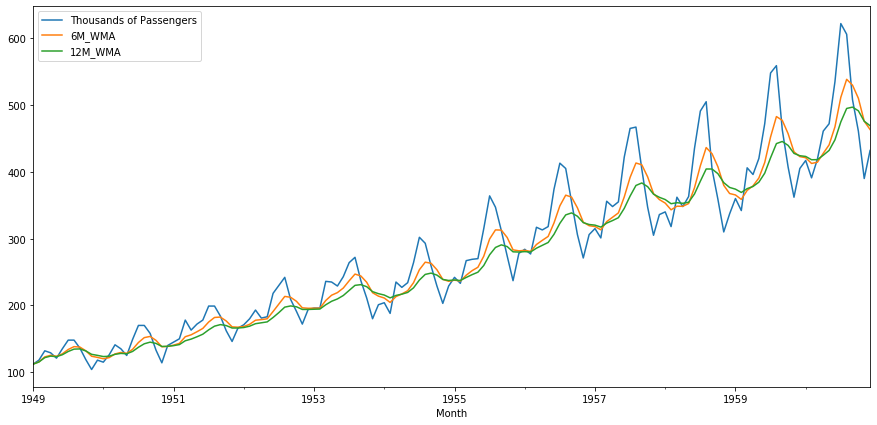

In [28]:
df[['Thousands of Passengers', '6M_WMA', '12M_WMA']].plot(figsize=(15, 7));

---

In [38]:
train_data = df[:'1959']
test_data = df['1960':]

y_hat = test_data.copy()

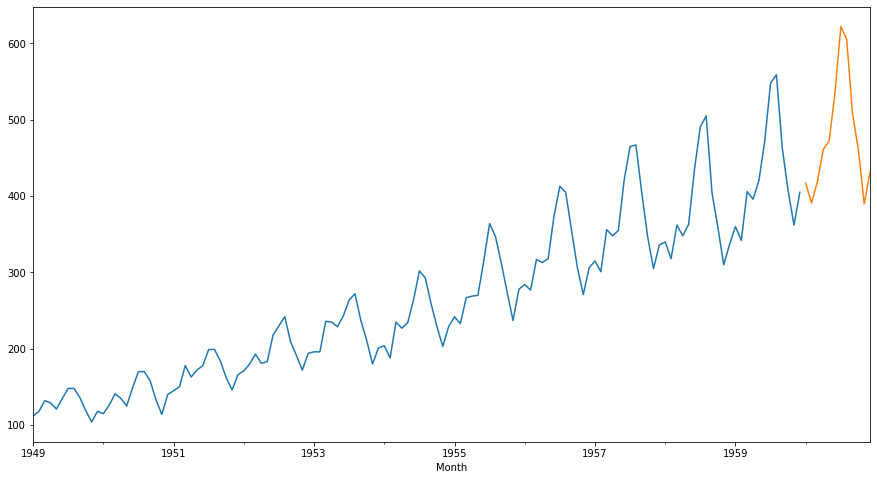

In [39]:
train_data['Thousands of Passengers'].plot(figsize=(15, 8));
test_data['Thousands of Passengers'].plot();

## Simple Exponential Smoothing (SES)

$F_{t+1} = F_t + a(A_t + F_t)$ (smoothing constant : 0 <= a <= 1)  
$F_{t+1} = aA_t + (1 - a)F_t$

로써,  
A 는 실제값, F 는 t 시점에서의 예측값, a 는 weight 이다.  
  
__(단, trend 와 seasonality 를 반영하지 못한다.  
그래서 고안된 방법으로 Holt, Holt-Winters 방법이 있다.__

In [40]:
from statsmodels.tsa.api import SimpleExpSmoothing

In [41]:
ses_model = SimpleExpSmoothing(np.asarray(train_data['Thousands of Passengers']))

In [42]:
ses_result = ses_model.fit()

In [44]:
y_hat['SES'] = ses_result.forecast(len(test_data))

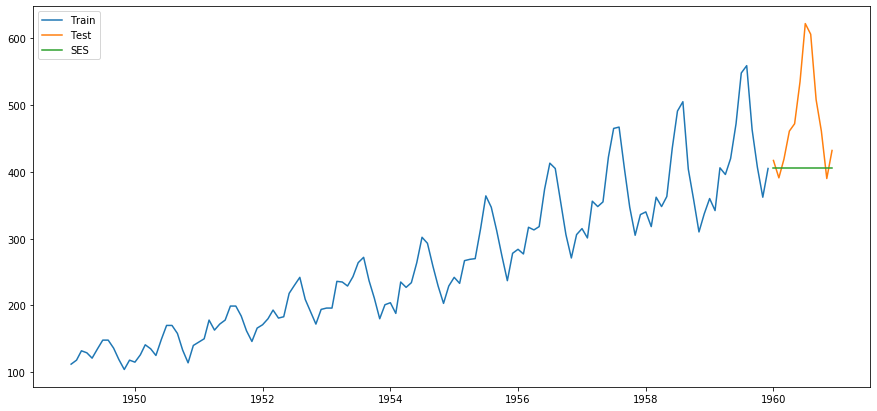

In [50]:
plt.figure(figsize=(15, 7))

plt.plot(train_data['Thousands of Passengers'], label='Train')
plt.plot(test_data['Thousands of Passengers'], label='Test')
plt.plot(y_hat['SES'], label='SES')

plt.legend()
plt.show()

In [53]:
rmse = np.sqrt(mean_squared_error(test_data['Thousands of Passengers'], y_hat['SES']))
rmse

102.97653454387881

## Holt's Method

기존 SES 에서 trend 까지 반영된 모델이다.

In [54]:
from statsmodels.tsa.api import Holt

In [55]:
holt_model = Holt(np.asarray(train_data['Thousands of Passengers']))

In [56]:
holt_result = holt_model.fit()

In [57]:
y_hat['Holt'] = holt_result.forecast(len(test_data))

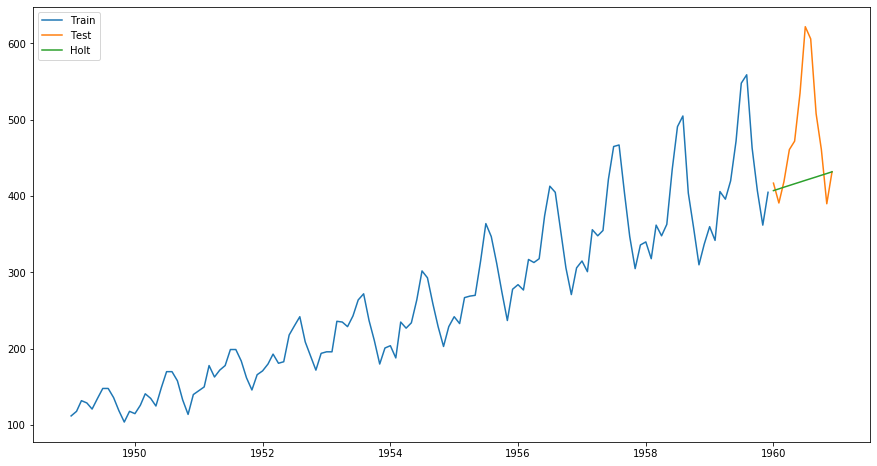

In [59]:
plt.figure(figsize=(15, 8))

plt.plot(train_data['Thousands of Passengers'], label='Train')
plt.plot(test_data['Thousands of Passengers'], label='Test')
plt.plot(y_hat['Holt'], label='Holt')

plt.legend()
plt.show()

In [60]:
rmse = np.sqrt(mean_squared_error(test_data['Thousands of Passengers'], y_hat['Holt']))
rmse

92.66641919109207

## Holt-Winter's Method

기존 SES 에서 trend 와 seasonality 가 반영된 모델이다.

In [61]:
from statsmodels.tsa.api import ExponentialSmoothing

In [63]:
winter_model = ExponentialSmoothing(
    np.asarray(train_data['Thousands of Passengers']),
    seasonal_periods=12,
    trend='additive',
    seasonal='additive'
)

In [64]:
winter_model_result = winter_model.fit()

/mnt/d/Study/AI/Time-Series-Analysis-and-ARIMA/time-series-analysis-and-arima/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [65]:
y_hat['Winter'] = winter_model_result.forecast(len(test_data['Thousands of Passengers']))

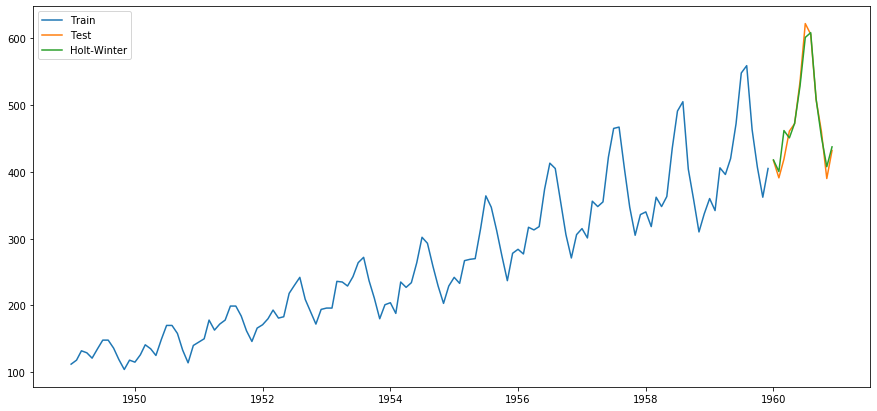

In [66]:
plt.figure(figsize=(15, 7))

plt.plot(train_data['Thousands of Passengers'], label='Train')
plt.plot(test_data['Thousands of Passengers'], label='Test')
plt.plot(y_hat['Winter'], label='Holt-Winter')

plt.legend()
plt.show()

In [68]:
rmse = np.sqrt(mean_squared_error(test_data['Thousands of Passengers'], y_hat['Winter']))
rmse

15.570830861607387

## ARIMA & SARIMA

ARIMA 는 다음부터 제대로 다룰 것.  
식도 복잡하고, parameter 를 구하는 것도 과정이 필요함. (grid search 를 이용한다고 함)  
  
- ARIMA : (p, d, q)
- SARIMA : (p, d, q), (P, D, Q), m
  
여기선 미리 구해둔 parameters 를 넣어서 결과만 확인.

In [69]:
import statsmodels.api as sm

In [70]:
sarima_model = sm.tsa.statespace.SARIMAX(
    train_data['Thousands of Passengers'],
    order=(2, 1, 1),  # (p, d, q)
    seasonal_order=(0, 1, 0, 12),  # (P, D, Q, m)
    enforce_stationarity=False,
    enforce_invertibility=False
)

/mnt/d/Study/AI/Time-Series-Analysis-and-ARIMA/time-series-analysis-and-arima/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [71]:
sarima_model_result = sarima_model.fit()

In [74]:
y_hat['SARIMA'] = sarima_model_result.predict(
    start='1960-01-01',
    end='1960-12-01',
    dynamic=True  # dynamic 은 예측된 결과를 이용해서 더 뒤의 데이터를 예측하게끔 한다. (원래 ARIMA 는 한 time 밖에 예측을 못 한다.)
)

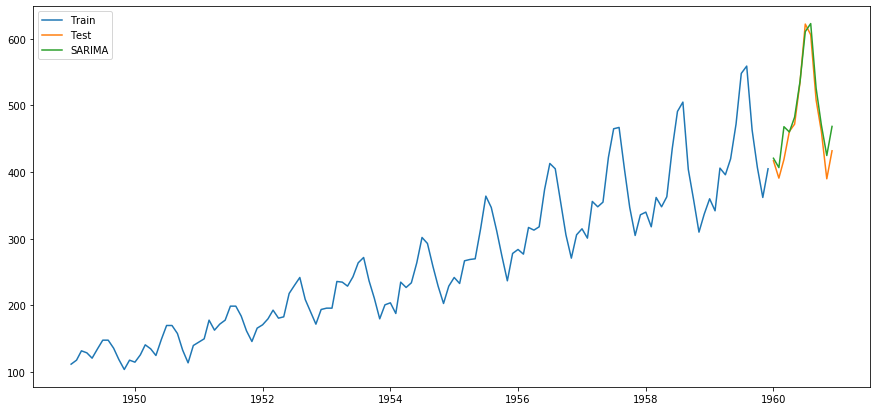

In [75]:
plt.figure(figsize=(15, 7))

plt.plot(train_data['Thousands of Passengers'], label='Train')
plt.plot(test_data['Thousands of Passengers'], label='Test')
plt.plot(y_hat['SARIMA'], label='SARIMA')

plt.legend()
plt.show()

In [76]:
rmse = np.sqrt(mean_squared_error(test_data['Thousands of Passengers'], y_hat['SARIMA']))
rmse

22.650964209025833